# use cv2 to process a video and detect motion 

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# read a video

In [3]:
cap = cv2.VideoCapture('space.mp4') # add any video here

# get the first frame

In [4]:
ret, frame = cap.read()

# convert the frame to gray scale

In [5]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# get the shape of the frame

In [6]:
height, width = gray.shape

# get the number of pixels

In [7]:
num_pixels = height * width

# get the number of frames

In [8]:
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# get the frame rate

In [9]:
fps = cap.get(cv2.CAP_PROP_FPS)

# get the total time

In [10]:
total_time = num_frames / fps

# get the total number of pixels

In [11]:
total_pixels = num_frames * num_pixels

# get the total number of pixels that changed

In [12]:
total_pixels_changed = 0

# plot the first frame

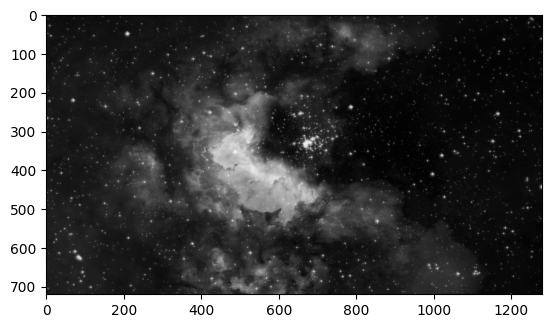

In [13]:
plt.imshow(gray, cmap='gray')

# get the first frame

In [14]:
ret, frame = cap.read()

# apply background subtraction

In [15]:
fgbg = cv2.createBackgroundSubtractorMOG2()
while ret:
    fgmask = fgbg.apply(frame)
    total_pixels_changed += np.sum(fgmask == 255)
    ret, frame = cap.read()

# apply morphological operations

In [16]:
kernel = np.ones((5,5),np.uint8)
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

# draw bounding boxes

In [17]:
contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if cv2.contourArea(c) < 1000:
        continue
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)

# play the video

In [ ]:
cap = cv2.VideoCapture('space.mp4')
while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# export to a text file in this format:

# Frame #1
# 128, 164, 32, 32
# 301, 101, 15, 80

# Frame #2
# 130, 170, 32, 32
# 298, 110, 15, 80

In [19]:
cap = cv2.VideoCapture('space.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()
kernel = np.ones((5,5),np.uint8)
with open('output.txt', 'w') as f:
    frame_num = 0
    while True:
        ret, frame = cap.read()
        if ret:
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            for c in contours:
                if cv2.contourArea(c) < 1000:
                    continue
                x,y,w,h = cv2.boundingRect(c)
                f.write(f'Frame #{frame_num}\n')
                f.write(f'{x}, {y}, {w}, {h}\n')
            frame_num += 1
        else:
            break